<a href="https://colab.research.google.com/github/YogaMarta/Pemrograman_Python/blob/main/Tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
cd /content/drive/MyDrive/Tugas11

/content/drive/MyDrive/Tugas11


In [81]:
ls

dataset/  nnmodel_scene/


In [82]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [83]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [84]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((192, 192))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [85]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [86]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [87]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [88]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 192, 192, 3)
(146, 192, 192, 3)


In [89]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(192,192,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 188, 188, 16)      1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 92, 92, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 32)       

In [91]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [92]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 13s 950ms/step - loss: 1.5970 - accuracy: 0.2443 - val_loss: 1.5299 - val_accuracy: 0.3493
Epoch 2/25
14/14 [==============================] - 15s 1s/step - loss: 1.4323 - accuracy: 0.3836 - val_loss: 1.3316 - val_accuracy: 0.3767
Epoch 3/25
14/14 [==============================] - 13s 954ms/step - loss: 1.1887 - accuracy: 0.4817 - val_loss: 1.1258 - val_accuracy: 0.5342
Epoch 4/25
14/14 [==============================] - 13s 953ms/step - loss: 0.9372 - accuracy: 0.6210 - val_loss: 0.9570 - val_accuracy: 0.6918
Epoch 5/25
14/14 [==============================] - 13s 952ms/step - loss: 0.7634 - accuracy: 0.7237 - val_loss: 0.9904 - val_accuracy: 0.6233
Epoch 6/25
14/14 [==============================] - 13s 950ms/step - loss: 0.6335 - accuracy: 0.7671 - val_loss: 0.8206 - val_accuracy: 0.7329
Epoch 7/25
14/14 [==============================] - 13s 947ms/step - loss: 0.5394 - accuracy: 0.8105 - val_loss: 0.8537 - val_accuracy: 0.6918
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


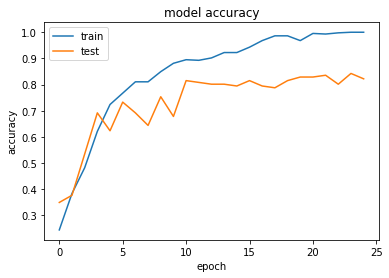

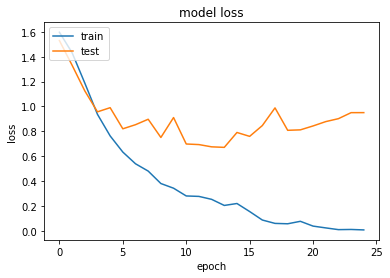

In [93]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.96      0.77      0.86        31
      GMB_02       0.78      0.88      0.82        24
      GMB_03       0.89      0.89      0.89        27
      GMB_04       0.73      0.77      0.75        31
      GMB_05       0.79      0.82      0.81        33

    accuracy                           0.82       146
   macro avg       0.83      0.83      0.83       146
weighted avg       0.83      0.82      0.82       146



In [98]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [100]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_133401_HDR.jpg'

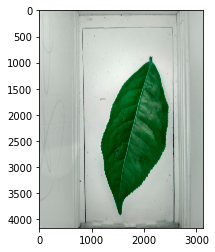

In [101]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [102]:
image_testing = Image.open('IMG_20200814_133401_HDR.jpg')
image_testing = np.array(image_testing.resize((192, 192))) / 255.0
image_testing.shape

(192, 192, 3)

In [103]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 192, 192, 3)


In [104]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.3582644e-14 1.0000000e+00 6.4535696e-19 1.8599063e-36 7.6421574e-15]]
['GMB_02']
